<a href="https://colab.research.google.com/github/YagoAndrade/Workshop-Data-Science/blob/main/Exerc%C3%ADcio_2_Dataset_dos_d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

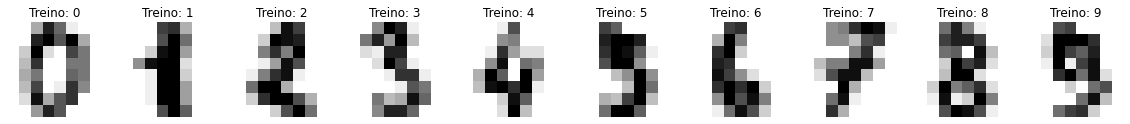

In [ ]:
## Carrega a base de dados dos dígitos
digits = datasets.load_digits()

## Printa as imagens de dígitos na base de dados
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Treino: %i' % label)

In [ ]:
## Remodela as imagens para o processamento
n_samples = len(digits.images)

## Define o X e armazena nele as informações que temos para predizer o Y
x = digits.images.reshape((n_samples, -1))

## Define o Y, o resultado que queremos descobrir
y = digits.target

In [ ]:
## Cria um classificador SVC
clf = svm.SVC(gamma=0.001)

In [ ]:
## Divide a base de dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Treina a arvore com os dados de treino
clf.fit(X_train, y_train)

## Prevê e classifica o valor do dígito baseado no subconjunto de teste
predicted = clf.predict(X_test)

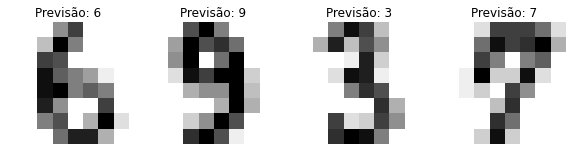

In [ ]:
## Printa as imagens de previsão
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Previsão: {prediction}')

In [ ]:
print(f"Relatório de classificação do {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Relatório de classificação do SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg     

Confusion matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  0  0  0  1  0 57]]


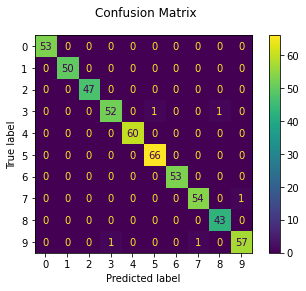

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Testando com o KNN e Decision Tree Classifier

In [ ]:
## Cria a primeira árvore de decisão do dataset dos dígitos
clf_digits = DecisionTreeClassifier(random_state=1234)
## Treina a arvore
arvore = clf_digits.fit(x, y)
## Avalia a arvore 
arvore.score(x,y)

1.0

In [ ]:
## Cria e roda o o KNN com n = 3
neigh_digits = KNeighborsClassifier(n_neighbors=3)
neigh_digits.fit(x, y)
neigh_digits.score(x, y)

0.993322203672788